In [2]:
import nibabel as nib 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [3]:
jd_nonharm_exp_to_insp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/jacobian_determinant_images_exptoinsp_reg"
jd_harm_exp_to_insp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/harmonized/jacobian_determinant_images_exptoinsp_reg"

jd_nonharm_insp_to_exp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/log_jacobian_determinant_images_insptoexp_withoutmask"
jd_harm_insp_to_exp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/harmonized/log_jacobian_determinant_images_insptoexp_withoutmask"

jd_nonharm_exptoinsp_files = os.listdir(jd_nonharm_exp_to_insp)
jd_nonharm_exp_to_insp_files = os.listdir(jd_harm_exp_to_insp)
jd_nonharm_insp_to_exp_files = os.listdir(jd_nonharm_insp_to_exp)
jd_nonharm_insp_to_exp_files = os.listdir(jd_harm_insp_to_exp)

In [6]:
file = nib.load(os.path.join(jd_nonharm_exp_to_insp, jd_nonharm_exptoinsp_files[0]))
data = file.get_fdata()

flattened = data.flatten()
np.max(flattened), np.min(flattened), np.mean(flattened), np.std(flattened)

(2.2290878295898438,
 0.28238943219184875,
 0.9999905037613678,
 0.12251525368109421)

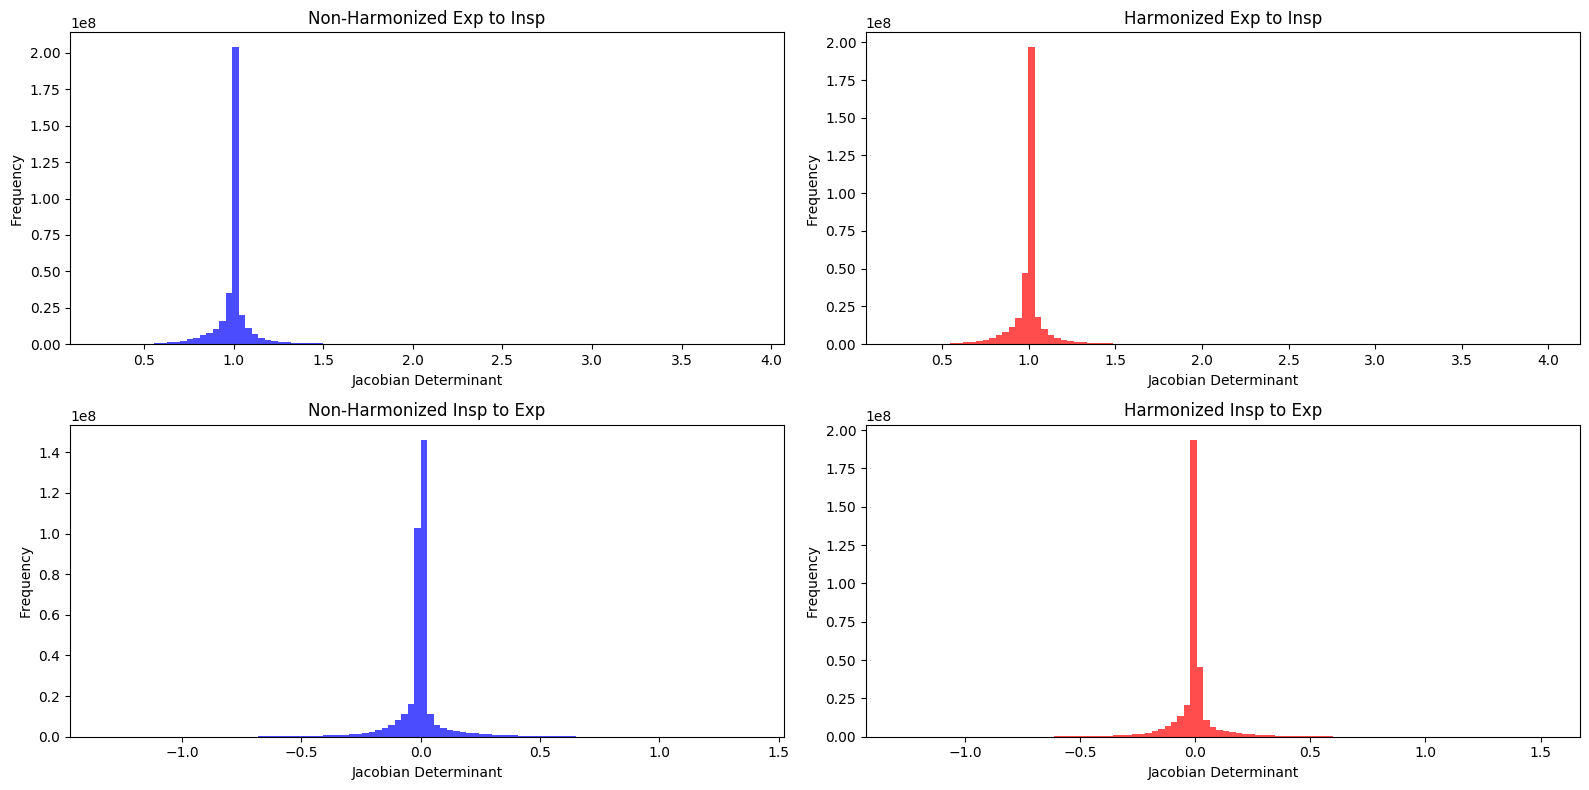

In [4]:
# Define paths
jd_nonharm_exp_to_insp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/jacobian_determinant_images_exptoinsp_reg"
jd_harm_exp_to_insp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/harmonized/jacobian_determinant_images_exptoinsp_reg"

jd_nonharm_insp_to_exp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/log_jacobian_determinant_images_insptoexp_withoutmask"
jd_harm_insp_to_exp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/harmonized/log_jacobian_determinant_images_insptoexp_withoutmask"

# List files
jd_nonharm_exp_to_insp_files = os.listdir(jd_nonharm_exp_to_insp)
jd_harm_exp_to_insp_files = os.listdir(jd_harm_exp_to_insp)
jd_nonharm_insp_to_exp_files = os.listdir(jd_nonharm_insp_to_exp)
jd_harm_insp_to_exp_files = os.listdir(jd_harm_insp_to_exp)

def load_jacobian_maps(file_paths, directory):
    """
    Load 3D Jacobian determinant maps from files.
    """
    maps = []
    for file in file_paths:
        file_path = os.path.join(directory, file)
        img = nib.load(file_path)
        data = img.get_fdata()
        maps.append(data)
    return maps

def flatten_maps(maps):
    """
    Flatten 3D maps into 1D arrays.
    """
    flattened = [map.flatten() for map in maps]
    return np.concatenate(flattened)

# Load and flatten maps
nonharm_exp_to_insp_maps = load_jacobian_maps(jd_nonharm_exp_to_insp_files, jd_nonharm_exp_to_insp)
harm_exp_to_insp_maps = load_jacobian_maps(jd_harm_exp_to_insp_files, jd_harm_exp_to_insp)
nonharm_insp_to_exp_maps = load_jacobian_maps(jd_nonharm_insp_to_exp_files, jd_nonharm_insp_to_exp)
harm_insp_to_exp_maps = load_jacobian_maps(jd_harm_insp_to_exp_files, jd_harm_insp_to_exp)

nonharm_exp_to_insp_flat = flatten_maps(nonharm_exp_to_insp_maps)
harm_exp_to_insp_flat = flatten_maps(harm_exp_to_insp_maps)
nonharm_insp_to_exp_flat = flatten_maps(nonharm_insp_to_exp_maps)
harm_insp_to_exp_flat = flatten_maps(harm_insp_to_exp_maps)

# Plot distributions
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.hist(nonharm_exp_to_insp_flat, bins=100, color='blue', alpha=0.7)
plt.title('Non-Harmonized Exp to Insp')
plt.xlabel('Jacobian Determinant')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(harm_exp_to_insp_flat, bins=100, color='red', alpha=0.7)
plt.title('Harmonized Exp to Insp')
plt.xlabel('Jacobian Determinant')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(nonharm_insp_to_exp_flat, bins=100, color='blue', alpha=0.7)
plt.title('Non-Harmonized Insp to Exp')
plt.xlabel('Jacobian Determinant')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(harm_insp_to_exp_flat, bins=100, color='red', alpha=0.7)
plt.title('Harmonized Insp to Exp')
plt.xlabel('Jacobian Determinant')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/jacobina_density_plots/jd_distributions.png", dpi=300)
plt.show()

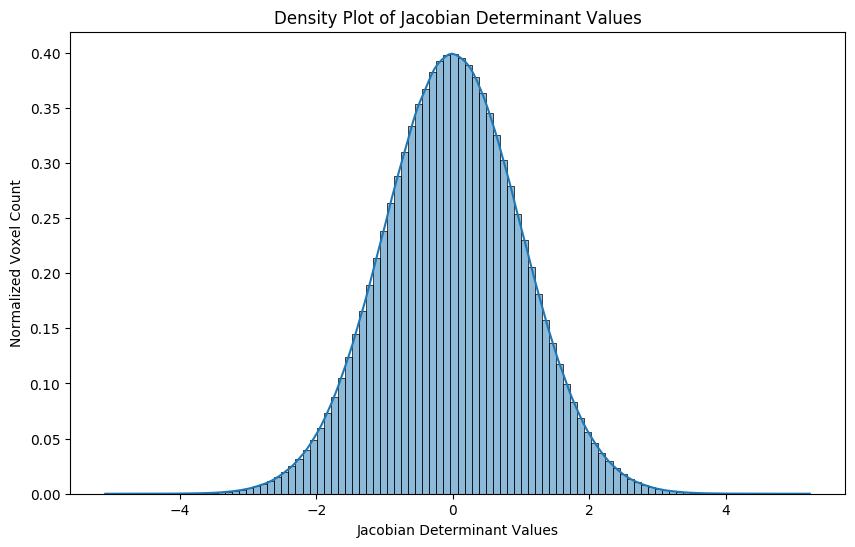

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your Jacobian determinant map as a 3D numpy array
# For example, let's create a dummy Jacobian determinant map
jacobian_determinant_map_case = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/non_harmonized/logjacobian_determinant_exptoinsp_nonharmonized/masked_COPDGene_B14644_STANDARD.nii.gz").get_fdata()
jacobian_determinant_map_control = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/non_harmonized/logjacobian_determinant_exptoinsp_nonharmonized/masked_COPDGene_B15777_STANDARD_control.nii.gz").get_fdata()

# Flatten the array to get a 1D array of values
jacobian_values = jacobian_determinant_map.flatten()

# Create a density plot
plt.figure(figsize=(10, 6))
sns.histplot(jacobian_values, bins=100, kde=True, stat='density')

# Set labels and title
plt.xlabel('Jacobian Determinant Values')
plt.ylabel('Normalized Voxel Count')
plt.title('Density Plot of Jacobian Determinant Values')

# Show the plot
plt.show()